## Observations and Insights 

In [100]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [101]:
# Combine the data into a single dataset
combine_data = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview
combine_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [102]:
# Checking the number of mice.
combine_data["Mouse ID"].nunique()

249

In [103]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# combine_data.duplicated(subset = ["Mouse ID", "Timepoint"])
combine_duplicate = combine_data.loc[combine_data.duplicated(subset = ["Mouse ID", "Timepoint"]), "Mouse ID"]
combine_duplicate

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [104]:
# Optional: Get all the data for the duplicate mouse ID. 
combine_data.loc[combine_data["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [105]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combine_data[combine_data["Mouse ID"] != "g989"]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [106]:
# Checking the number of mice in the clean DataFrame.
clean_data["Mouse ID"].nunique()

248

## Summary Statistics

In [107]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# Groupby Drug Regimen
drug_data = clean_data.groupby(["Drug Regimen"])

# Mean Tumor Volume
average_drug_data = drug_data["Tumor Volume (mm3)"].mean()

# Median Tumor Volume
median_drug_data = drug_data["Tumor Volume (mm3)"].median()

# Variance Tumor Volume
var_drug_data = drug_data["Tumor Volume (mm3)"].var()

# Standard Deviation Tumor Volume
std_drug_data = drug_data["Tumor Volume (mm3)"].std()

# SEM Tumor Volume
sem_drug_data = drug_data["Tumor Volume (mm3)"].sem()

# Summary Dataframe
drug_analysis = pd.DataFrame({"Tumor Volume Mean (mm3)":average_drug_data,
                              "Tumor Volume Median (mm3)":median_drug_data,
                              "Tumor Volume Variance (mm3)":var_drug_data, 
                              "Tumor Volume Standard Deviation (mm3)":std_drug_data, 
                              "Tumor Volume SEM (mm3)":sem_drug_data})
drug_analysis

,Tumor Volume Mean (mm3),Tumor Volume Median (mm3),Tumor Volume Variance (mm3),Tumor Volume Standard Deviation (mm3),Tumor Volume SEM (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [108]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
drug_analysis = clean_data.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
drug_analysis

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

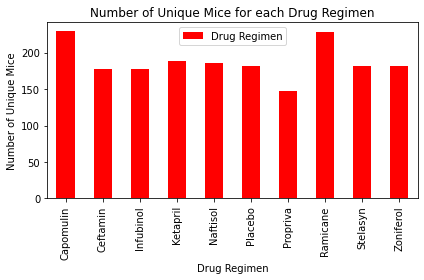

In [109]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

# Create Dataframe for count of mice for each regimen
drug_mice_count = pd.DataFrame(drug_data["Drug Regimen"].count())

# Create Bar chart
mice_bar_chart = drug_mice_count.plot(kind='bar', title="Number of Unique Mice for each Drug Regimen", color="red")

# Set the xlabel and ylabel using class methods
mice_bar_chart.set_xlabel("Drug Regimen")
mice_bar_chart.set_ylabel("Number of Unique Mice")
plt.tight_layout()

# Save the chart
plt.savefig("Charts/PandaBarChart.png")

plt.show()

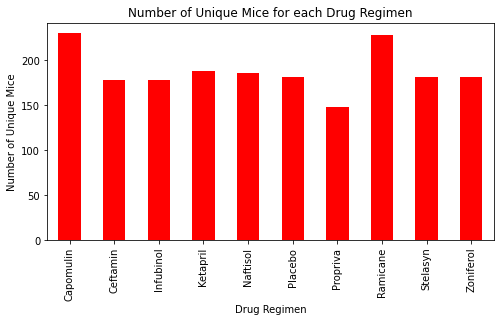

In [110]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

# Set x axis and tick locations
x_axis = np.arange(len(drug_mice_count))
tick_locations = [value for value in x_axis]

 # Create bar chart
plt.figure(figsize=(8,4))
plt.bar(x_axis, drug_mice_count["Drug Regimen"], color='red', align="center", width = 0.5)
plt.xticks(tick_locations, list(drug_mice_count.index), rotation="vertical")

# Set x and y limits
plt.xlim(-0.5, len(x_axis)-0.5)
plt.ylim(0, max(drug_mice_count["Drug Regimen"])*1.05)

# Create a Title and labels
plt.title("Number of Unique Mice for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice")

# Save the Chart and Show
plt.savefig("Charts/PyplotBarChart.png")

plt.show()

In [111]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Groupby Sex
gender = clean_data.groupby("Sex")

# Create Dataframe counting gender
gender_count = pd.DataFrame(gender["Mouse ID"].nunique())
gender_count

,Mouse ID
Sex,
Female,123
Male,125


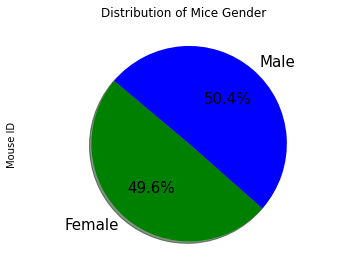

In [112]:
# Create a Pie Chart
gender_count.plot(kind="pie", subplots = True, title="Distribution of Mice Gender", startangle=140, 
                  autopct='%1.1f%%', shadow=True, fontsize=15, colors =["green","blue"], legend =False)

# Set axis
plt.axis("equal")

# Save the Chart and Show
plt.savefig("Charts/PandaPieChart.png")

plt.show()

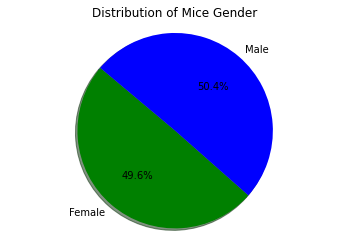

In [113]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Get Labels
labels = list(gender_count.index.values)

# Values of the pie chart
values = gender_count["Mouse ID"]

# The colors of each section of the pie chart
colors = ["green", "blue"]

# Create Pie Chart
plt.pie(values, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Create a Title
plt.axis("equal")
plt.title("Distribution of Mice Gender")

# Save the Chart and Show
plt.savefig("Charts/PyplotPieChart.png")

plt.show()


## Quartiles, Outliers and Boxplots

In [114]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_data.groupby(["Mouse ID"]).max()["Timepoint"] 

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

last_tumor_volume = pd.merge(last_timepoint, clean_data, how="left", on=("Mouse ID", "Timepoint"))
last_tumor_volume.set_index(["Mouse ID"])

,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,45,Infubinol,Female,20,23,67.973419,2
a251,45,Infubinol,Female,21,25,65.525743,1
a262,45,Placebo,Female,17,29,70.717621,4
a275,45,Ceftamin,Female,20,28,62.999356,3
a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...
z435,10,Propriva,Female,12,26,48.710661,0
z578,45,Ramicane,Male,11,16,30.638696,0
z581,45,Infubinol,Female,24,25,62.754451,3


In [115]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
plot_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for x in drug_list:
    last_tumor_volume_drug = last_tumor_volume.loc[last_tumor_volume["Drug Regimen"] == x, "Tumor Volume (mm3)"]
    plot_list.append(last_tumor_volume_drug)
    quartiles = last_tumor_volume_drug.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = [z for z in last_tumor_volume_drug if (z < lower_bound) | (z > upper_bound)]
    
    # Print results
    print(f"The IQR data for {x}:")
    print(f"The lower quartile of {x} is: {lowerq}")
    print(f"The upper quartile of {x} is: {upperq}")
    print(f"The interquartile range of {x} is: {iqr}")
    print(f"The the median of {x} is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} for {x} could be outliers.")
    print(f"Values above {upper_bound} for {x} could be outliers.")
    print(f"Therefore, {x} has possible outliers of {outliers}.")
    print(f"--------------------------------------------------------")
    

The IQR data for Capomulin:
The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.125164399999996 
Values below 20.70456164999999 for Capomulin could be outliers.
Values above 51.83201549 for Capomulin could be outliers.
Therefore, Capomulin has possible outliers of [].
--------------------------------------------------------
The IQR data for Ramicane:
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
Values below 17.912664470000003 for Ramicane could be outliers.
Values above 54.30681135 for Ramicane could be outliers.
Therefore, Ramicane has possible outliers of [].
--------------------------------------------------------
The IQR data for Infubinol:
The lower quartile of Infubinol is: 54.04860769
The upper q

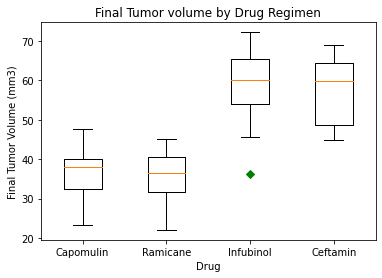

In [116]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor volume by Drug Regimen")
ax1.set_xlabel("Drug")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(plot_list, notch=0, sym='gD')
plt.xticks([1,2,3,4], drug_list)

# Save the Chart and Show
plt.savefig("Charts/BoxplotFinalTumorVol.png")

plt.show()

## Line and Scatter Plots

In [117]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Create a dataframe for only Capomulin
capomulin = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"]
capomulin

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [118]:
# Loc Mouse ID l509
mouse = capomulin.loc[capomulin["Mouse ID"] == "l509"]
mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2
376,l509,Capomulin,Male,17,21,25,44.006257,2
377,l509,Capomulin,Male,17,21,30,44.708055,2
378,l509,Capomulin,Male,17,21,35,40.207289,2
379,l509,Capomulin,Male,17,21,40,40.770813,2
380,l509,Capomulin,Male,17,21,45,41.483008,3


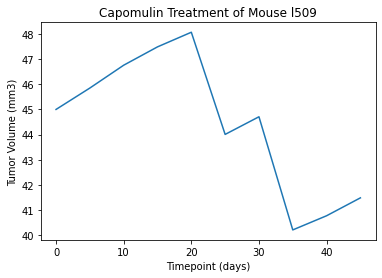

In [119]:
# Plot the line
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(mouse["Timepoint"], mouse["Tumor Volume (mm3)"])


# Save the Chart and Show
plt.savefig("Charts/LinePlotTimeTumorVolume.png")

plt.show()

In [120]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Generate DataFrame for weight and average tumor volume
capomulin_mouse_id = capomulin.groupby(["Mouse ID"]).agg(Mouse_Weight=("Weight (g)", np.mean), 
                                                         Tumor_Volume_Mean=("Tumor Volume (mm3)", np.mean))
capomulin_mouse_id

,Mouse_Weight,Tumor_Volume_Mean
Mouse ID,,
b128,22,41.963636
b742,21,40.083699
f966,17,36.505973
g288,19,41.990097
g316,22,44.613344
i557,24,44.805810
i738,20,39.141053
j119,23,44.465236
j246,21,43.216925


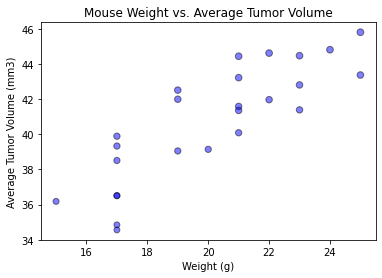

In [121]:
# Generate scatter plot
plt.scatter(capomulin_mouse_id["Mouse_Weight"], 
            capomulin_mouse_id["Tumor_Volume_Mean"], 
            marker='o', facecolors='blue', edgecolors='black', 
            s=capomulin_mouse_id["Tumor_Volume_Mean"], alpha=.5)

# Make title and labels
plt.title("Mouse Weight vs. Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Save the figure
plt.savefig("Charts/ScatterPlotWeightTumorVolume.png")

plt.show()

## Correlation and Regression

In [122]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Correlation coefficient
weight = capomulin_mouse_id["Mouse_Weight"]
volume = capomulin_mouse_id["Tumor_Volume_Mean"]
correlation = st.pearsonr(weight, volume)
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and average tumor volume is 0.84


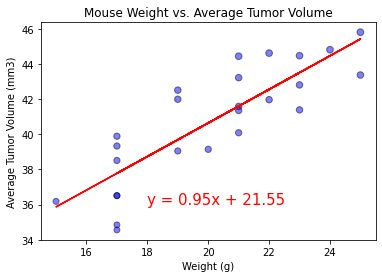

In [123]:
# Linear regression model

# Generate scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(capomulin_mouse_id["Mouse_Weight"], capomulin_mouse_id["Tumor_Volume_Mean"])
regress_values = capomulin_mouse_id["Mouse_Weight"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(capomulin_mouse_id["Mouse_Weight"], 
            capomulin_mouse_id["Tumor_Volume_Mean"], 
            marker='o', facecolors='blue', edgecolors='black', 
            s=capomulin_mouse_id["Tumor_Volume_Mean"], alpha=.5)

plt.plot(capomulin_mouse_id["Mouse_Weight"], regress_values, "r-")
plt.annotate(line_eq,(18,36),fontsize=15,color="red")

# Make title and labels
plt.title("Mouse Weight vs. Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Save the figure
plt.savefig("Charts/LinearRegrWeightTumorVolume.png")

plt.show()

In [124]:
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and average tumor volume is 0.84
